<a href="https://colab.research.google.com/github/AleksandrRevuka/Algo_data_science/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Hw9_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner

from sklearn.metrics import f1_score

from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D
from keras.regularizers import l2, l1
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam, Adamax, Ftrl
from keras.datasets import fashion_mnist

In [ ]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    val_acc_values = history_dict['val_accuracy']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.style.use('ggplot')

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='--')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.clf()
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--')
    plt.show()

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data, test_data = train_data / 255., test_data / 255.

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
clothing_classes = 10
n_hidden_1 = 64
n_hidden_2 = 128
n_hidden_3 = 256
epochs = 15

In [ ]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(n_hidden_3, activation='relu'),
        # Dropout((0.4)),
        Dense(n_hidden_2, activation='relu'),
        Dense(n_hidden_1, activation='relu'),
        Dense(clothing_classes, activation='softmax'),
    ])

    model.compile(
        optimizer=Adamax(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, epochs=epochs, validation_data=(test_data, test_labels))


Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5186 - accuracy: 0.8184 - val_loss: 0.4474 - val_accuracy: 0.8381
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3809 - accuracy: 0.8649 - val_loss: 0.4375 - val_accuracy: 0.8442
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3400 - accuracy: 0.8764 - val_loss: 0.3623 - val_accuracy: 0.8705
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3146 - accuracy: 0.8844 - val_loss: 0.3650 - val_accuracy: 0.8655
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8906 - val_loss: 0.3375 - val_accuracy: 0.8779
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2819 - accuracy: 0.8945 - val_loss: 0.3341 - val_accuracy: 0.8787
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2660 - accuracy: 0.9018 - val_loss: 0.3395 - val_accu

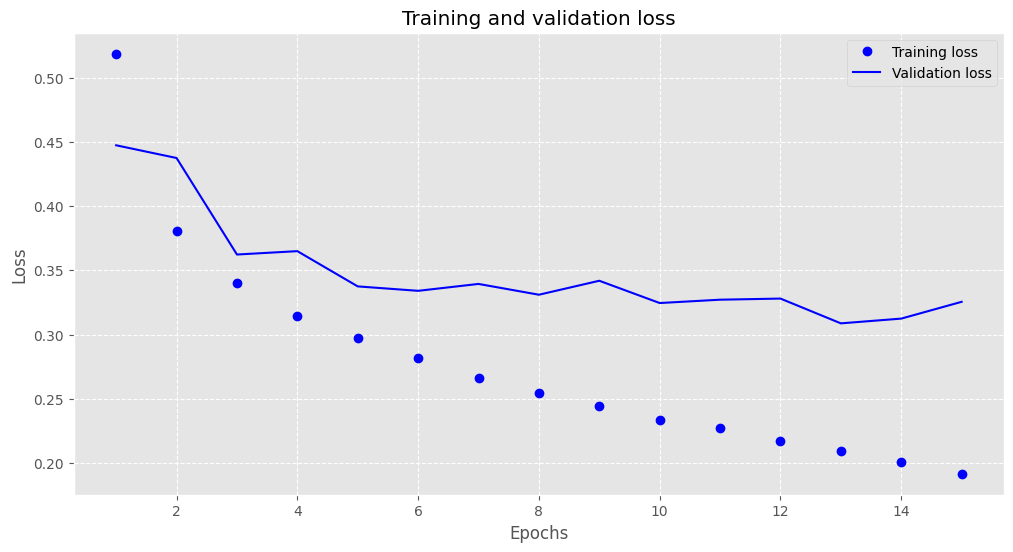

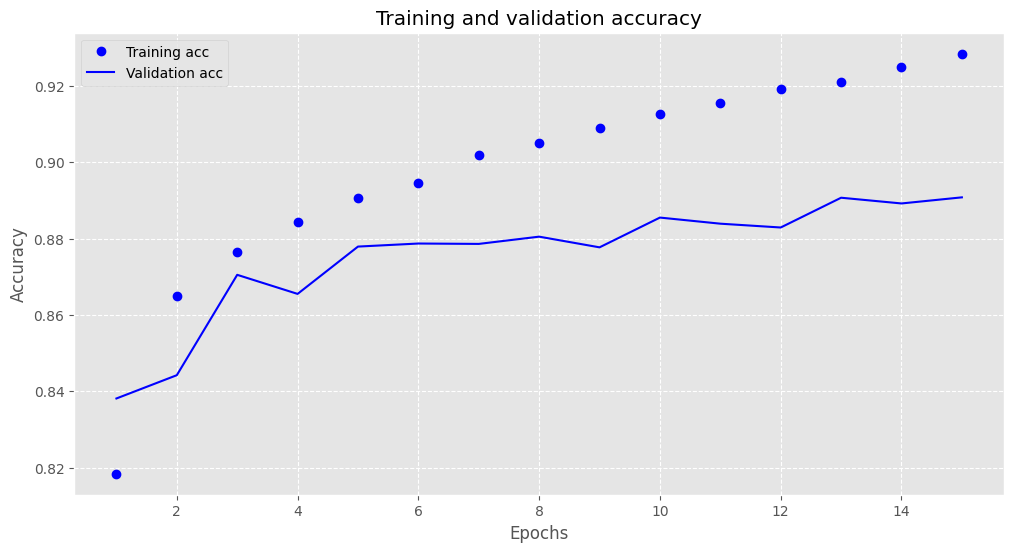

In [ ]:
plot_history(history)

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8908
[0.32553431391716003, 0.8907999992370605]


In [ ]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

f1 = f1_score(test_labels, y_pred_classes, average='weighted')
print('F1 Score:', f1)

313/313 [==============================] - 1s 2ms/step
F1 Score: 0.8902853587402436


# Автоматичний підбі гіперпараметрів.

In [ ]:
def build_model_auto(hp):
    model = Sequential()
    model.add(Flatten())
    for i in range(hp.Int("num_layers", 2, 4)):
      model.add(
          layers.Dense(
              units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
              activation="relu"
          )
      )

    # if hp.Boolean("dropout"):
    #     model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))

    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model_auto,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
# x_train = train_data[:-10000]
# x_val = train_data[-10000:]
# y_train = train_labels[:-10000]
# y_val = train_labels[-10000:]

# x_test = test_data

# y_train = to_categorical(y_train, clothing_classes)
# y_val = to_categorical(y_val, clothing_classes)
# y_test = to_categorical(test_labels, clothing_classes)

In [ ]:
tuner.search(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Trial 5 Complete [00h 02m 23s]
val_accuracy: 0.8845999836921692

Best val_accuracy So Far: 0.888700008392334
Total elapsed time: 00h 09m 59s


In [ ]:
models = tuner.get_best_models()
best_model = models[0]

# best_model.build(input_shape=(None, 28, 28))
# best_model.summary()

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 3
units_0: 416
units_1: 352
lr: 0.00023013205774155147
units_2: 32
Score: 0.888700008392334

Trial 4 summary
Hyperparameters:
num_layers: 2
units_0: 224
units_1: 192
lr: 0.0016395772926195201
units_2: 416
Score: 0.8845999836921692

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 384
lr: 0.0015571195830666284
units_2: 416
Score: 0.8822000026702881

Trial 3 summary
Hyperparameters:
num_layers: 3
units_0: 192
units_1: 64
lr: 0.0013135502932300573
units_2: 352
Score: 0.8817999958992004

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 160
units_1: 32
lr: 0.006868585356536235
units_2: 480
Score: 0.8651000261306763


In [5]:
def build_model(hp):
  model = Sequential([
    Conv2D(
        filters=hp.Int('conv_1_filter', min_value=64, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    Flatten(),
    Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    Dense(10, activation='softmax')
  ])

  model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [6]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
)

In [7]:
tuner.search(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
112               |112               |conv_1_filter
5                 |5                 |conv_1_kernel
32                |32                |conv_2_filter
5                 |5                 |conv_2_kernel
112               |112               |dense_1_units
0.01              |0.01              |learning_rate

Epoch 1/10
1875/1875 [==============================] - 511s 272ms/step - loss: 2.3306 - accuracy: 0.0987 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 504s 269ms/step - loss: 2.3039 - accuracy: 0.0997 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 2.3040 - accuracy: 0.1006

KeyboardInterrupt: ignored